In [1]:
import keras
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
import folium
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

In [2]:
data=pd.read_csv("C:/Users/LENOVO/Downloads/employee_churn.csv")
data.head()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10090.0,57.48,2.0,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18652.0,41.22,2.0,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13392.0,63.57,3.0,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13356.0,46.16,2.0,bachelor/diploma,3.812226,41.454702,-81.404655,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office_distance_from_house  1033 non-null   float64
 1   bonus_salary_percentage     1033 non-null   float64
 2   job_satisfaction            1033 non-null   float64
 3   education_level             1033 non-null   object 
 4   overtime_hour               1033 non-null   float64
 5   company_latitude            1033 non-null   float64
 6   company_longitude           1033 non-null   float64
 7   gender                      1033 non-null   int64  
 8   churn                       1033 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 72.8+ KB


In [4]:
data.describe(include="all")

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
count,1033.000000,1033.000000,1033.000000,1033,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,bachelor/diploma,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,551,NaN,NaN,NaN,NaN,NaN
mean,10771.866409,52.125208,2.482091,NaN,3.080121,41.653243,-87.962635,0.499516,0.299129
std,3810.278239,13.624713,0.877098,NaN,0.627240,3.705374,8.250586,0.500242,0.458098
min,583.000000,5.000000,0.000000,NaN,1.000000,30.000000,-119.646200,0.000000,0.000000
25%,8202.000000,42.600000,2.000000,NaN,2.628310,38.942425,-93.153696,0.000000,0.000000
50%,10530.000000,50.980000,3.000000,NaN,3.062020,41.557148,-86.857604,0.000000,0.000000
75%,13185.000000,61.730000,3.000000,NaN,3.483906,44.144209,-81.745459,1.000000,1.000000


In [5]:
np.sum(data.isnull())

office_distance_from_house    0
bonus_salary_percentage       0
job_satisfaction              0
education_level               0
overtime_hour                 0
company_latitude              0
company_longitude             0
gender                        0
churn                         0
dtype: int64

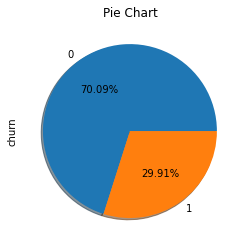

In [6]:
tipe = data['churn'].value_counts()
tipe.plot.pie(autopct='%.2f%%', shadow=True)
plt.title('Pie Chart')
plt.show()

In [7]:
s=data['company_latitude'].astype(str)+'_'+data['company_longitude'].astype(str)
s.mode()[0:10]

0                    30.0_-98.0356774937373
1     31.218603330644516_-68.75028265334569
2    31.761438721193684_-103.30732233707984
3      32.58307276772278_-72.67857211219932
4     32.688652163890445_-81.22178040025265
5    32.850636002083185_-107.29732972657914
6      32.97271494921266_-78.91586156055816
7     33.010298309505444_-78.51401156223052
8      33.18872658858245_-79.07890082440457
9      33.2203035327979_-119.32736957587838
dtype: object

In [40]:
print('EMPLOYEE COMPANY LOCATION')
svmap=folium.Map(location=[30.0,-98.0356774937373],zoom_start=4)
folium.Marker([31.218603330644516,-68.75028265334569],popup='Company',icon=folium.Icon(color="red", icon="info-sign")).add_to(svmap)
folium.Marker([30.0,-98.0356774937373],popup='Company',icon=folium.Icon(color="red", icon="info-sign")).add_to(svmap)
folium.Marker([31.761438721193684,-103.30732233707984],popup='Company',icon=folium.Icon(color="red", icon="info-sign")).add_to(svmap)
folium.Marker([32.58307276772278,-72.67857211219932],popup='Company',icon=folium.Icon(color="red", icon="info-sign")).add_to(svmap)
folium.Marker([32.688652163890445,-81.22178040025265],popup='Company',icon=folium.Icon(color="red", icon="info-sign")).add_to(svmap)
folium.Marker([32.850636002083185,-107.29732972657914],popup='Company',icon=folium.Icon(color="red", icon="info-sign")).add_to(svmap)
folium.Marker([32.97271494921266,-78.91586156055816],popup='Company',icon=folium.Icon(color="red", icon="info-sign")).add_to(svmap)
folium.Marker([33.010298309505444,-78.51401156223052],popup='Company',icon=folium.Icon(color="red", icon="info-sign")).add_to(svmap)
folium.Marker([33.18872658858245,-79.07890082440457],popup='Company',icon=folium.Icon(color="red", icon="info-sign")).add_to(svmap)
folium.Marker([33.2203035327979,-119.32736957587838],popup='Company',icon=folium.Icon(color="red", icon="info-sign")).add_to(svmap)
svmap

EMPLOYEE COMPANY LOCATION


In [9]:
a=0
b=0
c=0
d=0
for i in range(1033):
    a=a+data.iloc[i,3].count('bachelor/diploma')
    b=b+data.iloc[i,3].count('masters degree')
    c=c+data.iloc[i,3].count('higher education')
    d=d+data.iloc[i,3].count('high school')

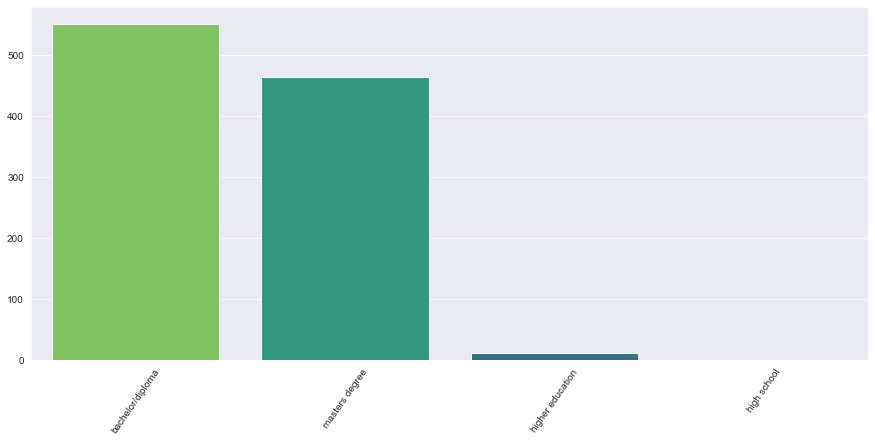

In [10]:
x=['bachelor/diploma','masters degree','higher education','high school']
y=[a,b,c,d]
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(x=x,y=y,ci=False, palette='viridis_r')
g.set_xticklabels(x, rotation=55, fontdict={'fontsize':10})
plt.show()

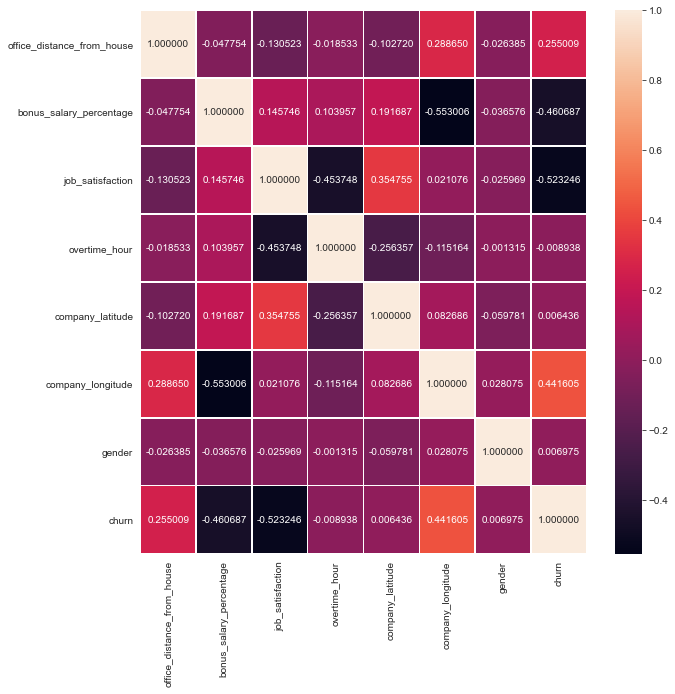

In [11]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt='.6f',ax=ax)
plt.show()

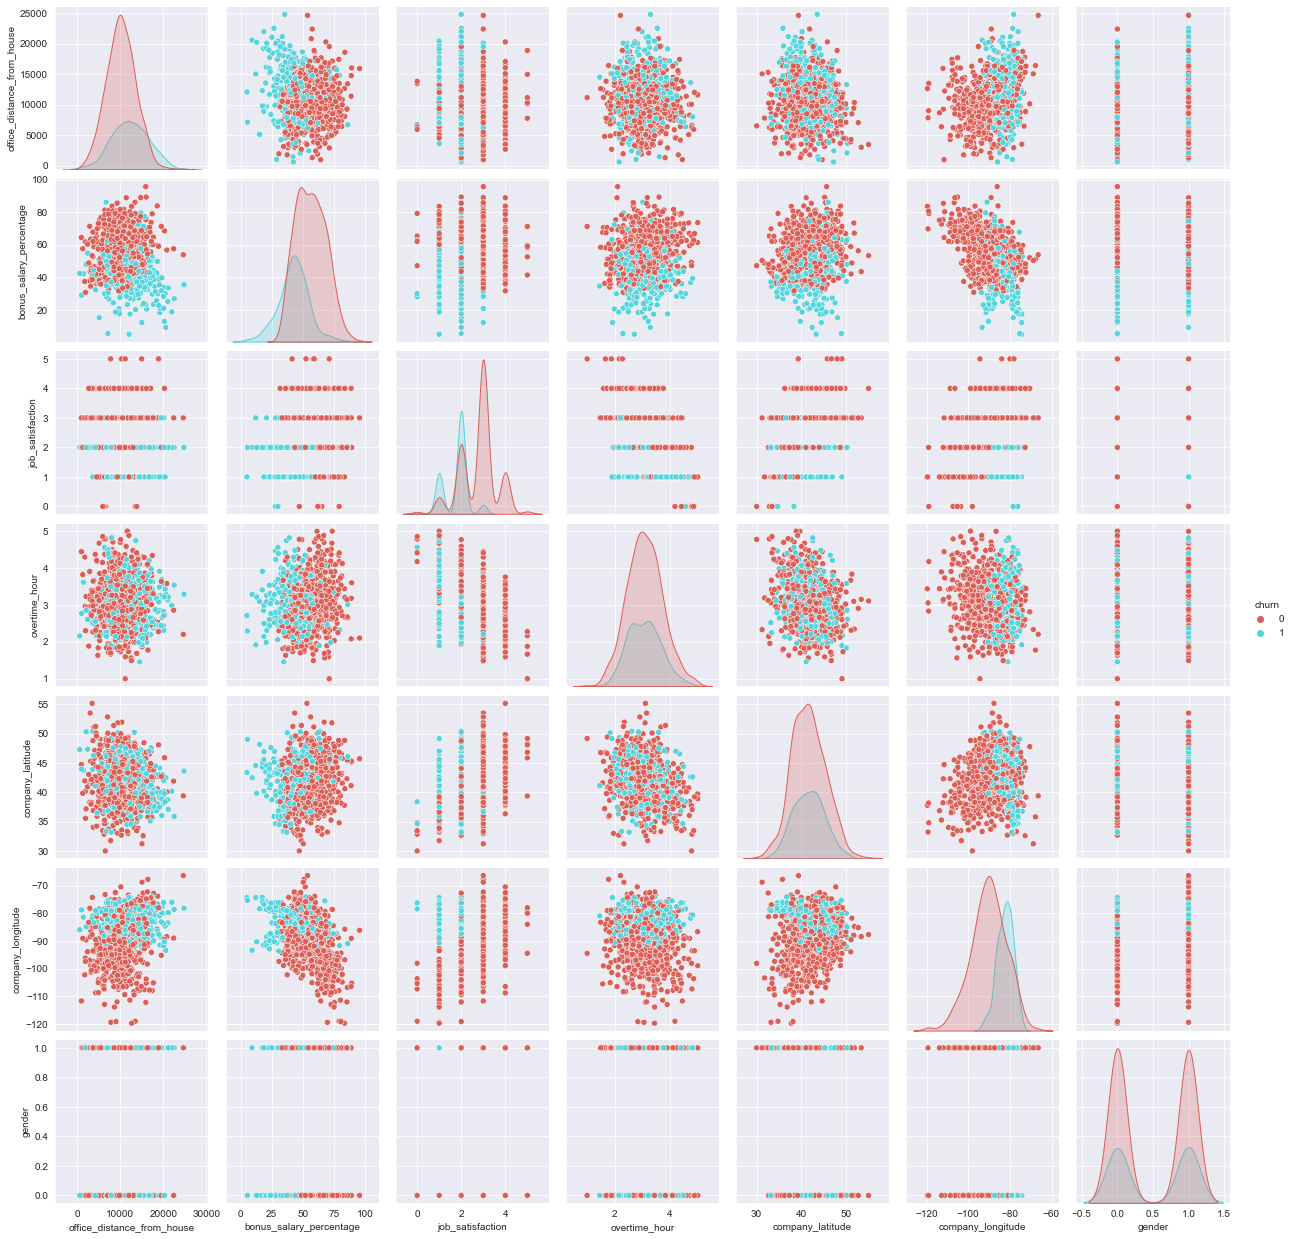

In [12]:
a=sns.pairplot(data,hue="churn", palette = 'hls')

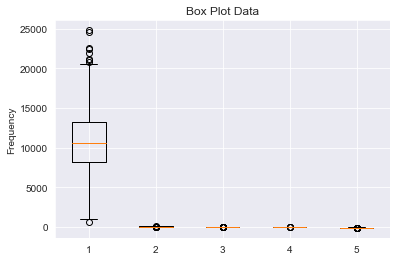

In [13]:
plt.boxplot(data[['office_distance_from_house','bonus_salary_percentage','overtime_hour','company_latitude','company_longitude']])
plt.title('Box Plot Data', size=12)
plt.ylabel('Frequency')
plt.show()

In [14]:
Q1 = data[['office_distance_from_house']].quantile(0.25)
Q3 = data[['office_distance_from_house']].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[['office_distance_from_house']] < (Q1 - 1.5 * IQR)) |(data[['office_distance_from_house']] > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10090.0,57.48,2.0,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18652.0,41.22,2.0,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13392.0,63.57,3.0,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13356.0,46.16,2.0,bachelor/diploma,3.812226,41.454702,-81.404655,1,1
...,...,...,...,...,...,...,...,...,...
1028,12972.0,73.90,2.0,bachelor/diploma,2.661765,44.070087,-91.305675,0,0
1029,7881.0,37.09,2.0,masters degree,2.518952,33.188727,-79.078901,0,1
1030,12003.0,66.86,1.0,masters degree,4.882591,39.208364,-93.532059,0,0
1031,9843.0,52.03,2.0,masters degree,3.829853,37.376921,-90.193134,0,0


In [15]:
labelencoder=LabelEncoder()
data[['education_level']]=labelencoder.fit_transform(data[['education_level']])
data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-15-666bce0eb875>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['education_level']]=labelencoder.fit_transform(data[['education_level']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,0,3.416556,33.309014,-93.330348,0,0
1,10090.0,57.48,2.0,0,2.897149,37.678983,-98.968097,0,0
2,18652.0,41.22,2.0,0,3.180264,37.175891,-77.442812,1,1
3,13392.0,63.57,3.0,0,3.429648,44.408084,-85.703296,0,0
4,13356.0,46.16,2.0,0,3.812226,41.454702,-81.404655,1,1
...,...,...,...,...,...,...,...,...,...
1028,12972.0,73.90,2.0,0,2.661765,44.070087,-91.305675,0,0
1029,7881.0,37.09,2.0,3,2.518952,33.188727,-79.078901,0,1
1030,12003.0,66.86,1.0,3,4.882591,39.208364,-93.532059,0,0
1031,9843.0,52.03,2.0,3,3.829853,37.376921,-90.193134,0,0


In [16]:
data[['office_distance_from_house']] = (data[['office_distance_from_house']] - data[['office_distance_from_house']].mean())/data[['office_distance_from_house']].std()
data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,-0.594109,42.51,1.0,0,3.416556,33.309014,-93.330348,0,0
1,-0.163779,57.48,2.0,0,2.897149,37.678983,-98.968097,0,0
2,2.169648,41.22,2.0,0,3.180264,37.175891,-77.442812,1,1
3,0.736125,63.57,3.0,0,3.429648,44.408084,-85.703296,0,0
4,0.726313,46.16,2.0,0,3.812226,41.454702,-81.404655,1,1
...,...,...,...,...,...,...,...,...,...
1028,0.621661,73.90,2.0,0,2.661765,44.070087,-91.305675,0,0
1029,-0.765805,37.09,2.0,3,2.518952,33.188727,-79.078901,0,1
1030,0.357576,66.86,1.0,3,4.882591,39.208364,-93.532059,0,0
1031,-0.231095,52.03,2.0,3,3.829853,37.376921,-90.193134,0,0


In [17]:
target = data['churn']

In [18]:
target

0       0
1       0
2       1
3       0
4       1
       ..
1028    0
1029    1
1030    0
1031    0
1032    0
Name: churn, Length: 1024, dtype: int64

In [19]:
features = data.drop('churn', axis=1)
features

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender
0,-0.594109,42.51,1.0,0,3.416556,33.309014,-93.330348,0
1,-0.163779,57.48,2.0,0,2.897149,37.678983,-98.968097,0
2,2.169648,41.22,2.0,0,3.180264,37.175891,-77.442812,1
3,0.736125,63.57,3.0,0,3.429648,44.408084,-85.703296,0
4,0.726313,46.16,2.0,0,3.812226,41.454702,-81.404655,1
...,...,...,...,...,...,...,...,...
1028,0.621661,73.90,2.0,0,2.661765,44.070087,-91.305675,0
1029,-0.765805,37.09,2.0,3,2.518952,33.188727,-79.078901,0
1030,0.357576,66.86,1.0,3,4.882591,39.208364,-93.532059,0
1031,-0.231095,52.03,2.0,3,3.829853,37.376921,-90.193134,0


In [20]:
lasso = Lasso(alpha=1)

In [21]:
lasso.fit(features, target)

Lasso(alpha=1)

In [22]:
lasso_coef = pd.DataFrame({'Feature' : features.columns, 'LassoCoef' :
                          lasso.coef_}).sort_values(by= 'LassoCoef',
                                                   ascending=False)
lasso_coef

,Feature,LassoCoef
6,company_longitude,0.001102
0,office_distance_from_house,0.000000
2,job_satisfaction,-0.000000
3,education_level,-0.000000
4,overtime_hour,0.000000
5,company_latitude,0.000000
7,gender,-0.000000
1,bonus_salary_percentage,-0.009444


In [23]:
lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])
lasso_coef.sort_values(by='LassoCoef', ascending=False)

,Feature,LassoCoef
1,bonus_salary_percentage,0.009444
6,company_longitude,0.001102
0,office_distance_from_house,0.000000
2,job_satisfaction,0.000000
3,education_level,0.000000
4,overtime_hour,0.000000
5,company_latitude,0.000000
7,gender,0.000000


In [24]:
lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(4)
lasso_df = pd.DataFrame({'Lasso Method' : lasso_df['Feature'].values})
lasso_df

,Lasso Method
0,bonus_salary_percentage
1,company_longitude
2,office_distance_from_house
3,job_satisfaction


In [25]:
data=data[['bonus_salary_percentage','company_longitude','office_distance_from_house','job_satisfaction','churn']]

In [26]:
X=data.drop('churn',axis=1)
X

,bonus_salary_percentage,company_longitude,office_distance_from_house,job_satisfaction
0,42.51,-93.330348,-0.594109,1.0
1,57.48,-98.968097,-0.163779,2.0
2,41.22,-77.442812,2.169648,2.0
3,63.57,-85.703296,0.736125,3.0
4,46.16,-81.404655,0.726313,2.0
...,...,...,...,...
1028,73.90,-91.305675,0.621661,2.0
1029,37.09,-79.078901,-0.765805,2.0
1030,66.86,-93.532059,0.357576,1.0
1031,52.03,-90.193134,-0.231095,2.0


In [27]:
y=data['churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
1028    0
1029    1
1030    0
1031    0
1032    0
Name: churn, Length: 1024, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (819, 4) (819,)
Test set: (205, 4) (205,)


In [29]:
clf = svm.SVC(kernel='rbf', gamma='auto',C=2)
clf.fit(X_train, y_train)

SVC(C=2, gamma='auto')

In [30]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       146
           1       0.94      0.80      0.86        59

    accuracy                           0.93       205
   macro avg       0.93      0.89      0.91       205
weighted avg       0.93      0.93      0.92       205

Confusion matrix, without normalization
[[143   3]
 [ 12  47]]


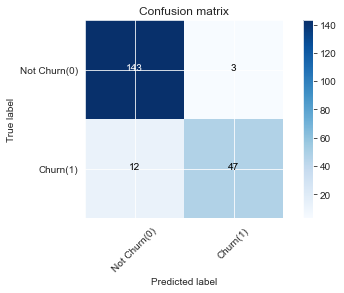

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Churn(0)','Churn(1)'],normalize= False,  title='Confusion matrix')

In [33]:
f1_score(y_test, yhat, average='weighted') 

0.9249023728617

In [39]:
l=s.value_counts()
l.describe()

count    1033.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64